# Just testing some stuff

In [10]:
import librosa
import librosa.display

import pandas as pd

import numpy as np

import requests

In [29]:
r = requests.get(pd.read_csv("animal-sound/multimedia.txt", delimiter="\t").identifier.values[200])
with open("test.mp3", "wb") as f:
  f.write(r.content)

In [30]:
audio = librosa.load("test.mp3")
audio

/home/pheithar/.local/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050)

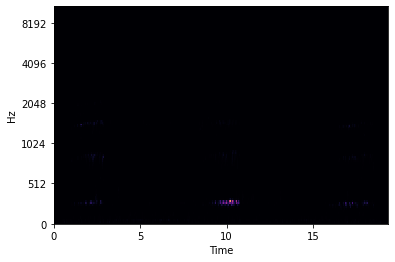

In [31]:
spect = librosa.feature.melspectrogram(audio[0])
librosa.display.specshow(spect, y_axis="mel", x_axis="time")

In [41]:
spect

array([[6.3541702e-06, 2.0152216e-03, 8.4239274e-02, ..., 5.1820725e-03,
        4.6672183e-04, 5.7038960e-06],
       [7.3474293e-06, 1.3159208e-03, 1.3260247e-01, ..., 1.2575893e-02,
        3.9471633e-04, 1.6879028e-05],
       [1.3308667e-05, 1.3761852e-03, 9.9487402e-02, ..., 3.7209511e-02,
        1.6674132e-03, 9.1267211e-06],
       ...,
       [7.4723786e-08, 1.9033207e-06, 1.5209220e-05, ..., 3.1174073e-05,
        1.7723324e-06, 1.9867048e-08],
       [2.2393612e-08, 7.4944523e-07, 6.3128550e-06, ..., 7.2486500e-06,
        7.9406044e-07, 3.0970106e-09],
       [2.5298068e-09, 7.8672230e-08, 8.4809426e-07, ..., 6.9495053e-07,
        4.2834909e-08, 2.9827540e-10]], dtype=float32)

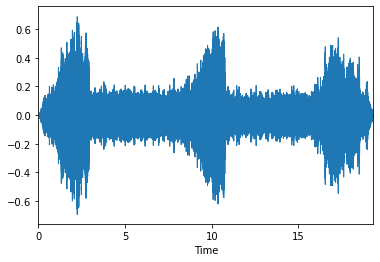

In [38]:
librosa.display.waveplot(audio[0])

In [44]:
list(pd.read_csv("animal-sound/occurrence.txt", delimiter="\t").columns)

['gbifID',
 'abstract',
 'accessRights',
 'accrualMethod',
 'accrualPeriodicity',
 'accrualPolicy',
 'alternative',
 'audience',
 'available',
 'bibliographicCitation',
 'conformsTo',
 'contributor',
 'coverage',
 'created',
 'creator',
 'date',
 'dateAccepted',
 'dateCopyrighted',
 'dateSubmitted',
 'description',
 'educationLevel',
 'extent',
 'format',
 'hasFormat',
 'hasPart',
 'hasVersion',
 'identifier',
 'instructionalMethod',
 'isFormatOf',
 'isPartOf',
 'isReferencedBy',
 'isReplacedBy',
 'isRequiredBy',
 'isVersionOf',
 'issued',
 'language',
 'license',
 'mediator',
 'medium',
 'modified',
 'provenance',
 'publisher',
 'references',
 'relation',
 'replaces',
 'requires',
 'rights',
 'rightsHolder',
 'source',
 'spatial',
 'subject',
 'tableOfContents',
 'temporal',
 'title',
 'type',
 'valid',
 'institutionID',
 'collectionID',
 'datasetID',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'ownerInstitutionCode',
 'basisOfRecord',
 'informationWithheld',
 'dataGeneral

In [62]:
pd.read_csv("animal-sound/occurrence.txt", delimiter="\t").gbifID

0        1572324720
1        1572324719
2        1572324718
3        1572324717
4        1572324716
            ...    
34253     779844260
34254     779844259
34255     779844258
34256     779844257
34257     779844256
Name: gbifID, Length: 34258, dtype: int64

In [67]:
pd.read_csv("animal-sound/occurrence.txt", delimiter="\t").species

True

In [66]:
pd.read_csv("animal-sound/occurrence.txt", delimiter="\t").genus

0             Crex
1             Crex
2             Crex
3             Crex
4             Crex
           ...    
34253    Accipiter
34254    Accipiter
34255    Accipiter
34256    Accipiter
34257    Accipiter
Name: genus, Length: 34258, dtype: object

In [64]:
pd.read_csv("animal-sound/occurrence.txt", delimiter="\t").family

0            Rallidae
1            Rallidae
2            Rallidae
3            Rallidae
4            Rallidae
             ...     
34253    Accipitridae
34254    Accipitridae
34255    Accipitridae
34256    Accipitridae
34257    Accipitridae
Name: family, Length: 34258, dtype: object

In [68]:
pd.read_csv("animal-sound/occurrence.txt", delimiter="\t").order

0             Gruiformes
1             Gruiformes
2             Gruiformes
3             Gruiformes
4             Gruiformes
              ...       
34253    Accipitriformes
34254    Accipitriformes
34255    Accipitriformes
34256    Accipitriformes
34257    Accipitriformes
Name: order, Length: 34258, dtype: object

In [73]:
pd.read_csv("animal-sound/occurrence.txt", delimiter="\t")["class"]

0        Aves
1        Aves
2        Aves
3        Aves
4        Aves
         ... 
34253    Aves
34254    Aves
34255    Aves
34256    Aves
34257    Aves
Name: class, Length: 34258, dtype: object

In [75]:
pd.read_csv("animal-sound/multimedia.txt", delimiter="\t").gbifID

0        1572324720
1        1572324719
2        1572324718
3        1572324717
4        1572324716
            ...    
16380     779844260
16381     779844259
16382     779844258
16383     779844257
16384     779844256
Name: gbifID, Length: 16385, dtype: int64

In [93]:
multi = pd.read_csv("animal-sound/multimedia.txt", delimiter="\t")[["gbifID", "identifier"]]
occur = pd.read_csv("animal-sound/occurrence.txt", delimiter="\t")[["gbifID", "species"]]

multi.merge(occur, on="gbifID", how="inner")

,gbifID,identifier,species
0,1572324720,http://www.tierstimmenarchiv.de/recordings/Cre...,Crex crex
1,1572324719,http://www.tierstimmenarchiv.de/recordings/Cre...,Crex crex
2,1572324718,http://www.tierstimmenarchiv.de/recordings/Cre...,Crex crex
3,1572324717,http://www.tierstimmenarchiv.de/recordings/Cre...,Crex crex
4,1572324716,http://www.tierstimmenarchiv.de/recordings/Cre...,Crex crex
...,...,...,...
16380,779844260,http://www.tierstimmenarchiv.de/recordings/Acc...,Accipiter gentilis
16381,779844259,http://www.tierstimmenarchiv.de/recordings/Acc...,Accipiter gentilis
16382,779844258,http://www.tierstimmenarchiv.de/recordings/Acc...,Accipiter gentilis
16383,779844257,http://www.tierstimmenarchiv.de/recordings/Acc...,Accipiter nisus


In [89]:
multi

,gbifID,identifier
0,1572324720,http://www.tierstimmenarchiv.de/recordings/Cre...
1,1572324719,http://www.tierstimmenarchiv.de/recordings/Cre...
2,1572324718,http://www.tierstimmenarchiv.de/recordings/Cre...
3,1572324717,http://www.tierstimmenarchiv.de/recordings/Cre...
4,1572324716,http://www.tierstimmenarchiv.de/recordings/Cre...
...,...,...
16380,779844260,http://www.tierstimmenarchiv.de/recordings/Acc...
16381,779844259,http://www.tierstimmenarchiv.de/recordings/Acc...
16382,779844258,http://www.tierstimmenarchiv.de/recordings/Acc...
16383,779844257,http://www.tierstimmenarchiv.de/recordings/Acc...
